# Statistics

Simulated data (from geometric distribution with p=0.12, added 1 - minimum 1 friend)

In [1]:
num_friends = [17, 15,  1, 13,  2,  6, 17,  4,  1,  7,  2,  1,  3,  1,  6,  1,  5, 19,  7,  2,  4,  5,  8,  2,  2, 32, 16, 10, 
               3,  4,  1,  2,  1, 10,  3, 9, 17,  2, 19,  2,  8,  2,  2,  1,  3,  1,  8, 24,  4,  6,  3,  7,  1,  6,  3,  3, 
               13, 26, 11,  2,  3, 13,  2,  1,  2, 17,  4, 16,  1, 10, 4,  2, 17,  2,  4, 10, 11,  2,  7,  9,  6,  4,  1, 19, 
               14, 40, 15,  1,  4,  2, 10,  8, 17, 32, 12, 28,  3,  2,  7, 24,  4, 22,  4,  1,  4, 4, 29, 17, 14,  4,  4,  4, 
               14, 11,  8, 10, 10, 14, 38,  9, 11,  2,  8, 13, 12,  9,  5, 11,  7,  6,  4,  8,  5,  5,  2,  3,  5,  6,  9, 21,
               1,  3,  2,  2,  3,  1, 16,  8, 14,  6,  9,  5, 14,  4,  2,  3,  1, 14,  4,  4,  4, 17,  1,  1,  4,  1,  4,  5,  
               6,  6,  2,  1, 13,  6,  2, 9,  8,  9,  4,  3,  6,  7, 21,  4,  2,  1,  3, 47,  5,  4,  8,  9, 100,  4,  6, 18,  
               4, 16,  8, 35,  3,  4,  3,  9]

Minutes per day (simulated as num_friends + 20 + rounded runif(-20,20))

In [4]:
daily_minutes = [18, 25, 41, 25, 15, 14, 24, 22, 35, 38,  8, 19, 40, 26, 30, 23,  6, 54, 24, 12, 16,  6, 37, 22, 40, 53, 35, 
                 46, 25, 20, 28,  4,  1, 24, 38, 43, 31, 15, 52, 31, 48, 27, 26, 28, 23, 28, 11, 45, 11, 30, 36, 21, 19, 29, 
                 13, 15, 47, 54, 41, 14, 20, 47, 29,  2, 22, 31, 34, 22, 32, 47, 30, 35, 28, 12, 10, 16, 20,  7, 42, 18, 21, 
                 12, 32, 27, 19, 42, 16, 10,  4,  5, 23, 39, 33, 39, 21, 59, 14, 41, 45, 46, 14, 44, 41,  8, 25, 10, 64, 47, 
                 36, 38, 32,  6, 35, 33, 32, 33, 13, 29, 44, 12, 43, 25, 19, 22, 48, 38, 28, 27,  7,  8, 39, 39, 28, 29,  4, 
                 25, 40, 45, 41, 59, 10,  6, 17, 41,  8, 33, 16, 26, 42, 28, 34, 40, 32, 29, 27, 39, 19, 52, 36, 19, 35, 18, 
                 27,  6, 42, 28, 14, 17, 20, 32,  5, 13, 42, 10, 23, 33, 38, 44, 21, 14, 19, 32, 48,  5, 32, 35,  2, 70, 30, 
                 42, 29, 15,  0, 41, 27, 48, 34, 31, 11, 66, 30, 24, 20, 42]

In [6]:
from collections import Counter, OrderedDict
import matplotlib.pyplot as plt

In [8]:
friend_counts = Counter(num_friends)
friend_counts

Counter({4: 29,
         2: 26,
         1: 23,
         3: 17,
         6: 13,
         8: 11,
         9: 10,
         5: 9,
         17: 8,
         7: 7,
         10: 7,
         14: 7,
         13: 5,
         11: 5,
         16: 4,
         19: 3,
         15: 2,
         32: 2,
         24: 2,
         12: 2,
         21: 2,
         26: 1,
         40: 1,
         28: 1,
         22: 1,
         29: 1,
         38: 1,
         47: 1,
         100: 1,
         18: 1,
         35: 1})

Histogram

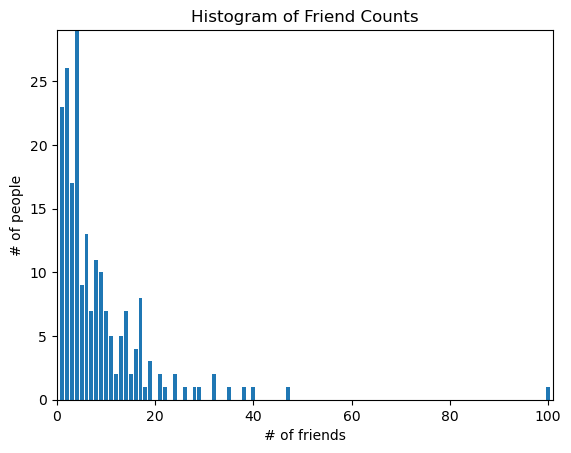

In [13]:
xs = range(101) # largest value is 100
ys = [friend_counts[x] for x in xs] # height is just # of friends
plt.bar(xs, ys)
plt.axis([0, 101, 0, 29])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()

Some descriptive statistics

In [16]:
num_points = len(num_friends)
num_points

204

In [18]:
largest_value = max(num_friends) # 100
largest_value

100

In [20]:
smallest_value = min(num_friends) #1
smallest_value

1

In [22]:
sorted_values = sorted(num_friends)
smallest_value = sorted_values[0]
smallest_value

1

In [24]:
second_smallest_value = sorted_values[1] #1
second_smallest_value

1

In [26]:
second_largest_value = sorted_values[-2] # 47
second_largest_value

47

## Central tendencies

Arithmetic mean

In [30]:
from typing import List # note capital L

def mean(xs: List[float]) -> int: #with "List" we want to specify that we want xs to be list of floats
    return sum(xs) / len(xs)

mean(num_friends) #

8.470588235294118

Median

In [33]:
# The underscores indicate that these are "private" functions, as they're
# intended to be called by our median function but not by other people
# using our statistics library.

def _median_odd(xs: List[float]) -> float:
    """If len(xs) is odd, the median is the middle element"""
    return sorted(xs)[len(xs) // 2] #the floor division // rounds the result down to the nearest whole number

def _median_even(xs: List[float]) -> float:
    """If len(xs) is even, it's the average of the middle two elements"""
    sorted_xs = sorted(xs)
    hi_midpoint = len(xs) // 2 # e.g. length 4 => hi_midpoint 2
    return (sorted_xs[hi_midpoint - 1] + sorted_xs[hi_midpoint]) / 2

def median(v: List[float]) -> float:
    """Finds the 'middle-most' value of v"""
    return _median_even(v) if len(v) % 2 == 0 else _median_odd(v)

Check that the previous function is doing what we expect (assert)

In [36]:
assert median([1, 10, 2, 9, 5]) == 5

In [38]:
assert median([1, 10, 2, 9, 5]) == 6 #wrong

AssertionError: 

In [40]:
assert median([1, 9, 2, 10]) == (2 + 9) / 2

In [42]:
print(median(num_friends)) # 5

5.0


Quantiles

In [45]:
def quantile(xs: List[float], p: float) -> float:
    """Returns the pth-percentile value in x"""
    p_index = int(p * len(xs))
    return sorted(xs)[p_index]

In [47]:
print(quantile(num_friends, 0.10))
print(quantile(num_friends, 0.25))
print(quantile(num_friends, 0.75))
print(quantile(num_friends, 0.90))

1
3
11
17


Modus

In [50]:
def mode(x: List[float]) -> List[float]:
    """Returns a list, since there might be more than one mode"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
            if count == max_count]

In [52]:
print(mode(num_friends))

[4]


In [54]:
assert set(mode(num_friends)) == {4}

In [56]:
assert set(mode(num_friends)) == 4 #wrong!

AssertionError: 

## Dispersion

In [59]:
# "range" already means something in Python, so we'll use a different name
def data_range(xs: List[float]) -> float:
    return max(xs) - min(xs)

In [61]:
data_range(num_friends)

99

Variance

In [64]:
#preparations from linear algebra

Vector = List[float]

def dot(v: Vector, w: Vector) -> float: #inner product of two vectors
    """Computes v_1 * w_1 + ... + v_n * w_n"""
    assert len(v) == len(w), "vectors must be same length"
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def sum_of_squares(v: Vector) -> float:
    """Returns v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

In [66]:
def de_mean(xs: List[float]) -> List[float]:
    """Translate xs by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(xs)
    return [x - x_bar for x in xs]

def variance(xs: List[float]) -> float:
    """Almost the average squared deviation from the mean"""
    assert len(xs) >= 2, "variance requires at least two elements"
    n = len(xs)
    deviations = de_mean(xs)
    return sum_of_squares(deviations) / (n - 1)

In [68]:
variance(num_friends)

103.47203709069835

Standard deviation

In [71]:
import math

def standard_deviation(xs: List[float]) -> float:
    """The standard deviation is the square root of the variance"""
    return math.sqrt(variance(xs))

standard_deviation(num_friends)

10.172120579834784

Interquantile range

In [74]:
def interquartile_range(xs: List[float]) -> float:
    """Returns the difference between the 75%-ile and the 25%-ile"""
    return quantile(xs, 0.75) - quantile(xs, 0.25)
 
interquartile_range(num_friends)

8

median absolute deviation

In [77]:
from scipy import stats

stats.median_abs_deviation(num_friends)

3.0

## Correlation

In [80]:
def covariance(xs: List[float], ys: List[float]) -> float:
    assert len(xs) == len(ys), "xs and ys must have same number of elements"
    return dot(de_mean(xs), de_mean(ys)) / (len(xs) - 1)

In [82]:
daily_hours = daily_minutes / 60 #does not work (we're working with a list)

TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [84]:
daily_hours = [x / 60 for x in daily_minutes]
print(daily_hours)

[0.3, 0.4166666666666667, 0.6833333333333333, 0.4166666666666667, 0.25, 0.23333333333333334, 0.4, 0.36666666666666664, 0.5833333333333334, 0.6333333333333333, 0.13333333333333333, 0.31666666666666665, 0.6666666666666666, 0.43333333333333335, 0.5, 0.38333333333333336, 0.1, 0.9, 0.4, 0.2, 0.26666666666666666, 0.1, 0.6166666666666667, 0.36666666666666664, 0.6666666666666666, 0.8833333333333333, 0.5833333333333334, 0.7666666666666667, 0.4166666666666667, 0.3333333333333333, 0.4666666666666667, 0.06666666666666667, 0.016666666666666666, 0.4, 0.6333333333333333, 0.7166666666666667, 0.5166666666666667, 0.25, 0.8666666666666667, 0.5166666666666667, 0.8, 0.45, 0.43333333333333335, 0.4666666666666667, 0.38333333333333336, 0.4666666666666667, 0.18333333333333332, 0.75, 0.18333333333333332, 0.5, 0.6, 0.35, 0.31666666666666665, 0.48333333333333334, 0.21666666666666667, 0.25, 0.7833333333333333, 0.9, 0.6833333333333333, 0.23333333333333334, 0.3333333333333333, 0.7833333333333333, 0.48333333333333334

In [86]:
import numpy
daily_hours_vec = numpy.array(daily_minutes)/60 #not a list any more
print(daily_hours_vec)

[0.3        0.41666667 0.68333333 0.41666667 0.25       0.23333333
 0.4        0.36666667 0.58333333 0.63333333 0.13333333 0.31666667
 0.66666667 0.43333333 0.5        0.38333333 0.1        0.9
 0.4        0.2        0.26666667 0.1        0.61666667 0.36666667
 0.66666667 0.88333333 0.58333333 0.76666667 0.41666667 0.33333333
 0.46666667 0.06666667 0.01666667 0.4        0.63333333 0.71666667
 0.51666667 0.25       0.86666667 0.51666667 0.8        0.45
 0.43333333 0.46666667 0.38333333 0.46666667 0.18333333 0.75
 0.18333333 0.5        0.6        0.35       0.31666667 0.48333333
 0.21666667 0.25       0.78333333 0.9        0.68333333 0.23333333
 0.33333333 0.78333333 0.48333333 0.03333333 0.36666667 0.51666667
 0.56666667 0.36666667 0.53333333 0.78333333 0.5        0.58333333
 0.46666667 0.2        0.16666667 0.26666667 0.33333333 0.11666667
 0.7        0.3        0.35       0.2        0.53333333 0.45
 0.31666667 0.7        0.26666667 0.16666667 0.06666667 0.08333333
 0.38333333 0.65    

Let's return back to computing covariance

In [89]:
covariance(num_friends, daily_minutes)

48.084033613445385

In [91]:
covariance(num_friends, daily_hours)

0.8014005602240897

In [93]:
covariance(num_friends, daily_minutes)/covariance(num_friends, daily_hours) #60

60.00000000000001

In [95]:
def correlation(xs: List[float], ys: List[float]) -> float:
    """Measures how much xs and ys vary in tandem about their means"""
    stdev_x = standard_deviation(xs)
    stdev_y = standard_deviation(ys)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(xs, ys) / stdev_x / stdev_y
    else:
        return 0 # if no variation, correlation is zero

In [97]:
correlation(num_friends, daily_minutes)

0.33556392554641223

In [99]:
correlation(num_friends, daily_hours)

0.33556392554641223

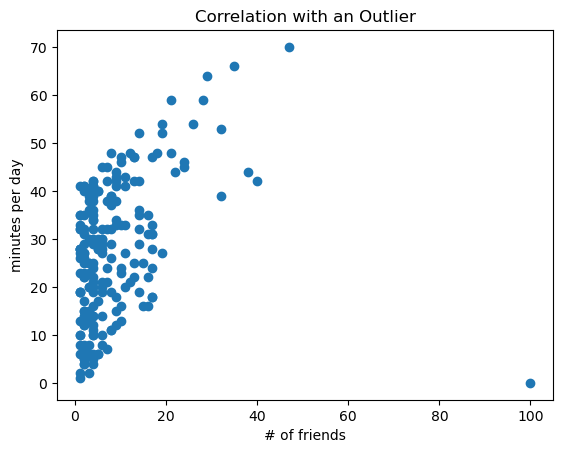

In [101]:
plt.scatter(num_friends, daily_minutes)
plt.title("Correlation with an Outlier")
plt.xlabel("# of friends")
plt.ylabel("minutes per day")
plt.show()

In [103]:
num_friends.index(100)

192

In [105]:
outlier = num_friends.index(100) # index of outlier
num_friends_good = [x
                    for i, x in enumerate(num_friends)
                    if i != outlier]
daily_minutes_good = [x
                      for i, x in enumerate(daily_minutes)
                      if i != outlier]
daily_hours_good = [dm / 60 for dm in daily_minutes_good]

In [107]:
print(correlation(num_friends_good, daily_minutes_good))
print(correlation(num_friends_good, daily_hours_good))

0.5522353046196972
0.5522353046196973


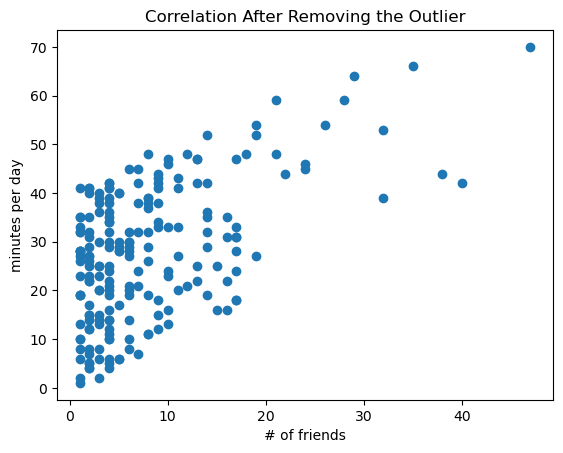

In [109]:
plt.scatter(num_friends_good, daily_minutes_good)
plt.title("Correlation After Removing the Outlier")
plt.xlabel("# of friends")
plt.ylabel("minutes per day")
plt.show()